In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

data = pd.read_csv (r'C:/Users/YB519ST/Videos/CaseStudy/Sales_add (1).csv')
print(data)


       Month      Region      Manager  Sales_before_digital_add(in $)  \
0    Month-1  Region - A  Manager - A                          132921   
1    Month-2  Region - A  Manager - C                          149559   
2    Month-3  Region - B  Manager - A                          146278   
3    Month-4  Region - B  Manager - B                          152167   
4    Month-5  Region - C  Manager - B                          159525   
5    Month-6  Region - A  Manager - B                          137163   
6    Month-7  Region - C  Manager - C                          130625   
7    Month-8  Region - A  Manager - A                          131140   
8    Month-9  Region - B  Manager - C                          171259   
9   Month-10  Region - C  Manager - B                          141956   
10  Month-11  Region - B  Manager - C                          159339   
11  Month-12  Region - A  Manager - A                          178939   
12  Month-13  Region - B  Manager - A              

# Descripitive Analysis & Null Value Check

In [3]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [4]:
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

From the above analysis we can conclude that :

We have 22 rows and 5 Features(Columns) in the dataset.


No missing values in the given data set.

**Performing the case study as required by the company**

[Text(0.5, 1.0, 'Sales After digital add(in $)')]

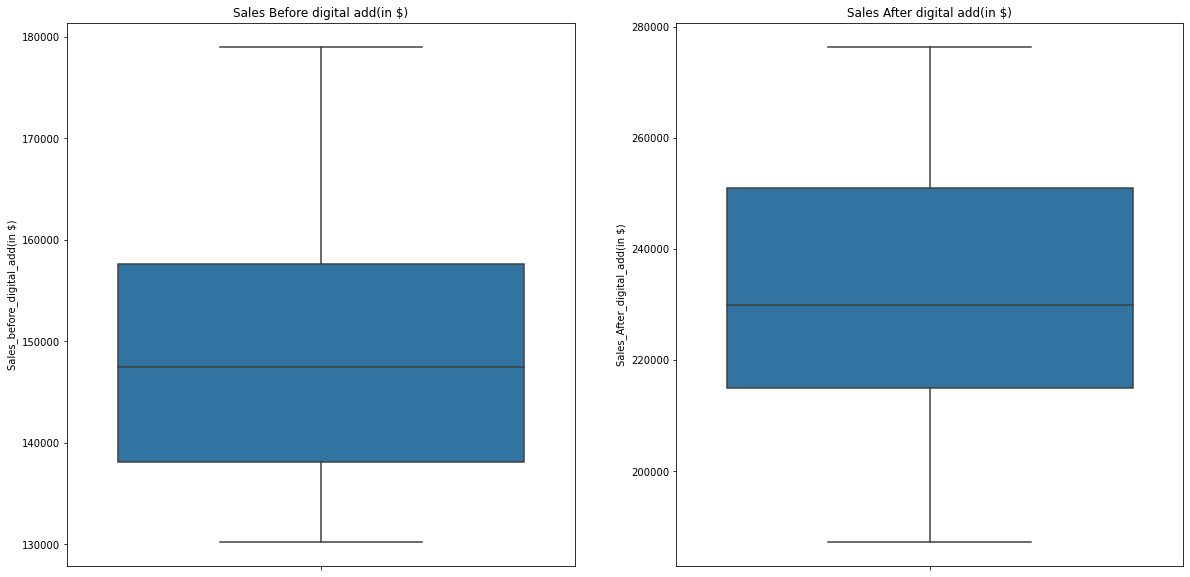

In [7]:

fig, (ax4,ax5) = plt.subplots(figsize = (20,10), nrows = 1, ncols = 2)

# Plotting and customizing the axes
sns.boxplot( y = "Sales_before_digital_add(in $)" , data = data, ax = ax4)
ax4.set(title = "Sales Before digital add(in $)")
sns.boxplot( y = "Sales_After_digital_add(in $)" , data = data, ax = ax5);
ax5.set(title = "Sales After digital add(in $)")

**Case 1: Whether there is any increase in sales after stepping into digital marketing** 

**STEP 1**

We'll define the Null and Alternate Hypothesis. and set the Significance level.

Null Hypothesis :
H0 : Sales After Digital Advertising will be less than or equal to the sales before Digital Advertising.

Alternate Hypothesis :
Ha : Sales After Digital Advertising will be Greater than the sales before usage of Digital Advertising.

The Confidence level for this test will be 95% & we'll set the level of Significance as alpha = 0.05.

**STEP 2**

calculating the T-score and p value .

In [9]:
sales_before = df[["Sales_before_digital_add(in $)"]]

sales_after = df[["Sales_After_digital_add(in $)"]]

#  Conducting a 2 sample 1 tail T test:

t_score, p = stats.ttest_rel(sales_after, sales_before, alternative="greater")
print("The Test statistic scores are : \nt-score = %0.3f , p-value = %0.3f \n" % (t_score, p) )

The Test statistic scores are : 
t-score = 12.091 , p-value = 0.000 



**Step 3:**

Calculated t score with the Critical Value

In [14]:
t_critical = 1.721 

if t_score > t_critical:
    print("Rejecting the H0\n\n")
else:

    print("\ failing to reject the H0\n")

Rejecting the H0




**STEP 4:**

inferences

From the above Analysis we can say the following about our Hypothesis:

As the calculated t-score > critical t-score value (i.e. at 5% or 0.05), We Reject the H0 ie is Null Hypothesis. We can say that there is a significant increase in sales after doing Digital advertisements.

**Case 2 : Checking whether there is any dependency between the features “Region” and “Manager”**

STEP 1:

We'll define the Null and Alternate Hypothesis. and set the Significance level.

Assuming that:

Null Hypothesis

H0 : No significant dependency between the Region and the Manager features.

Alternate Hypothesis

Ha : There is a significant amount of dependency between the Region and the Manager features.

The Confidence level for this test will be 95% & we'll set the level of Significance as alpha = 0.05.

**Step 2: Summarising the Data**

In [11]:
data_value = pd.crosstab(data["Region"],data["Manager"])
data_value

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


**Step3:** Calculating  degree of Freedom,Chi square value, pvalue,

In [13]:
stat, p, dof, expected = chi2_contingency(data_value)

print(f"The Test chi-square value is :\t{stat:.3f}")
print(f"\nThe p-Value is :  \t{p:.3f}" )
print(f"\nThe Degree of freedom is : \t{dof}")

chi2_critical = 9.488 

if stat > chi2_critical:
    print(f"Rejecting the H0")
else:
    print ("\n Failing to  reject the H0")

The Test chi-square value is :	3.051

The p-Value is :  	0.549

The Degree of freedom is : 	4

 Failing to  reject the H0


Step4:

From the above Analysis we can say the following about our Hypothesis:

The calculated chi2 value < Critical chi2 value at 0.05 significance level and the calculated p-value > 0.05. Failing to reject H0 ie the Null Hypothesis.

Hence,we can conclude that there is no significant relationship between the Region and Manager features.

Overall Conclusion from the Study

**There was a significant amount of increase in sales generated after the company started investing in Digital Marketing.:**

**There isn't a significant dependency between the Regions and the Managers associated with the regions:**